In [18]:
import pyclesperanto as cle
import numpy as np
import time
import tifffile as tiff
import matplotlib.pyplot as plt
from skimage.io import imread

# Image Processing using clEsperanto

We know how to push and pull data towards our device, we can know apply processing function to it.

The clEsperanto API follow a pattern:

> output = cle.operation_name(input, output, args)

Each functions are documented, you can access though your IDE or using the `cle.operation_name?` idiom un notebook

In [ ]:
from skimage.filters import gaussian, threshold_otsu
from skimage.measure import label, regionprops

start = time.time()
image = imread("https://imagej.net/ij/images/blobs.gif").squeeze().astype(np.float32)
blurred_image = gaussian(image, sigma=3)
binary_image = blurred_image > threshold_otsu(blurred_image)
labeled_image = label(binary_image)
props = regionprops(labeled_image)
print(f"Processing time: {time.time() - start} seconds")

fig, axs = plt.subplots(1, 4, figsize=(12, 6))
axs[0].imshow(image, cmap='gray')
axs[1].imshow(blurred_image, cmap='gray')
axs[2].imshow(binary_image, cmap='gray')
axs[3].imshow(labeled_image, cmap='nipy_spectral')
for ax in axs:
    ax.axis('off')
plt.show()

/var/folders/zj/f0mdkdsx3c90vqr74hcmlsy1y5r2jp/T/ipykernel_1951/2555863432.py:8: UserWarning: threshold_otsu is expected to work correctly only for grayscale images; image shape (254, 256, 3) looks like that of an RGB image.
  binary_image = blurred_image > threshold_otsu(blurred_image)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [7.0..247.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [7.346564..226.24078].


Processing time: 0.015679121017456055 seconds


ValueError: arrays must be of dtype byte, short, float32 or float64

<Figure size 1200x600 with 4 Axes>

Let's reproduce a similar processing pipeline using clEsperanto operation

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [7.0..247.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [7.032405..237.37762].


Processing time: 1.7615470886230469 seconds


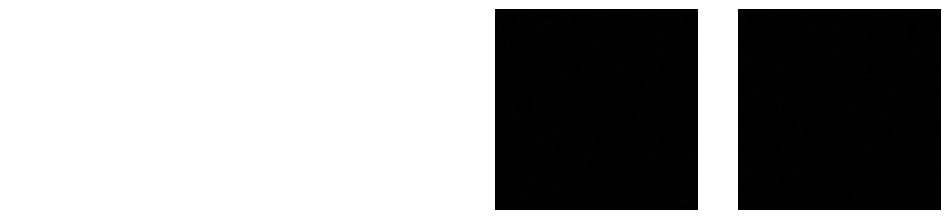

In [ ]:
start = time.time()
image = imread("https://imagej.net/ij/images/blobs.gif").squeeze().astype(np.float32)
blurred_image = cle.gaussian_blur(image, sigma_x=3, sigma_y=3)
binary_image = cle.threshold_otsu(blurred_image)
labeled_image = cle.connected_component_labeling(binary_image)
props = cle.statistics_of_labelled_pixels(label=labeled_image, intensity=image)
print(f"Processing time: {time.time() - start} seconds")

fig, axs = plt.subplots(1, 4, figsize=(12, 6))
axs[0].imshow(image, cmap='gray')
axs[1].imshow(blurred_image, cmap='gray')
axs[2].imshow(binary_image, cmap='gray')
axs[3].imshow(labeled_image, cmap='nipy_spectral')
for ax in axs:
    ax.axis('off')
plt.show()